In [0]:
import pandas as pd
# it is used for data analysis

import numpy as np
# it is used for any scientific computation

import seaborn as sb
# it is used for statistical plotting

import matplotlib.pyplot as plt
# it is used for graphs

% matplotlib inline
# use to run matplot lib in jupyter nb

import math

from sklearn.model_selection import train_test_split
# to split the test train data

from sklearn.linear_model import LogisticRegression
# for using Logistic Regression

from sklearn import metrics
# To calculate all the important terms like accuracy, precision and F1 errors


# Best on Data Rendundancy
# https://cmdlinetips.com/2019/09/how-to-drop-duplicate-rows-in-pandas/

# nu,p

# Logistic Regression Using Model


## The Data
Let's start by reading in the titanic_train.csv file into a pandas dataframe.


In [0]:
titanic =pd.read_csv( 'https://raw.githubusercontent.com/deepanshumehtaa/csvfiles/master/titanic.csv' )
# importing the csv file

In [3]:
titanic.head()
# printing the first 5 rows

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


## Exploratory Data Analysis
Let's begin some exploratory data analysis! We'll start by checking out missing data!


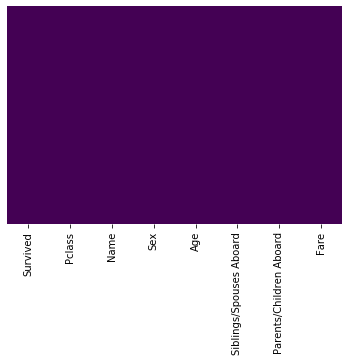

In [4]:
sb.heatmap(titanic. isnull ( ) , yticklabels=False, cbar=False, cmap= 'viridis' )
# pictorial way to see the null values present the data 

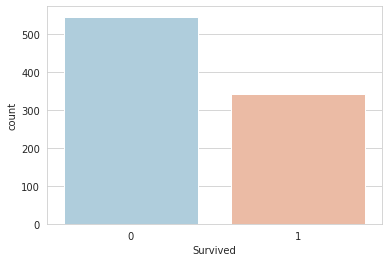

In [5]:
sb.set_style( 'whitegrid')
sb.countplot(x='Survived' , data=titanic, palette= 'RdBu_r' )

# from the given data it is concluded that the person dies in the titanic incident were more than the person survives
# it shows loss to the human life

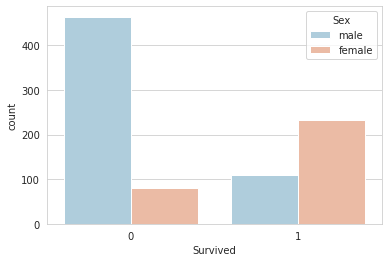

In [17]:
sb.set_style( 'whitegrid')
sb.countplot(x='Survived' , hue = 'Sex',data=titanic, palette= 'RdBu_r' )

# from the given data it is concluded that the person dies in the titanic incident were more than the person survives

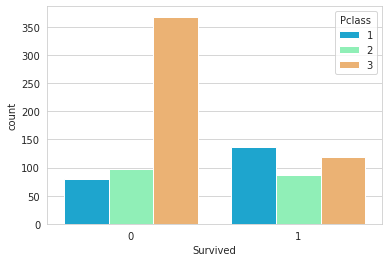

In [18]:
sb.set_style( 'whitegrid')
sb.countplot(x='Survived' , hue = 'Pclass', data=titanic, palette= 'rainbow' )

# from the given data it is concluded that the person dies in the titanic incident were mostly belong to class 3

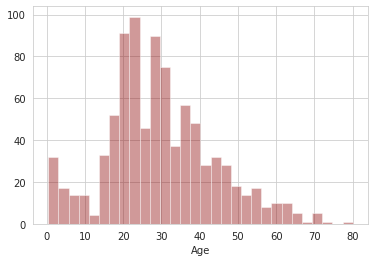

In [19]:
sb.distplot(titanic[ 'Age' ].dropna() , kde=False, color= 'darkred' , bins=30)

# from the given data it is concluded that 
# most of the pessangers were middle aged 

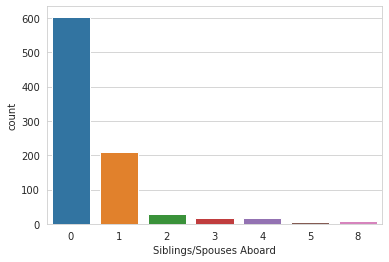

In [21]:
sb.countplot(x= 'Siblings/Spouses Aboard' , data=titanic)

# from the given data it is concluded that 
# 

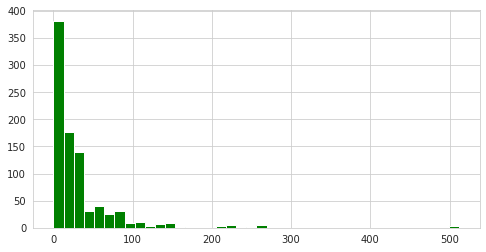

In [22]:
titanic['Fare'].hist(color='green',bins=40,figsize=(8,4))

## Data Cleaning
We want to fill in missing age data instead of just dropping the missing age data rows. One way to do this is by
filling in the mean age of all the passengers (imputation). However we can be smarter about this and check the
average age by passenger class. For example:

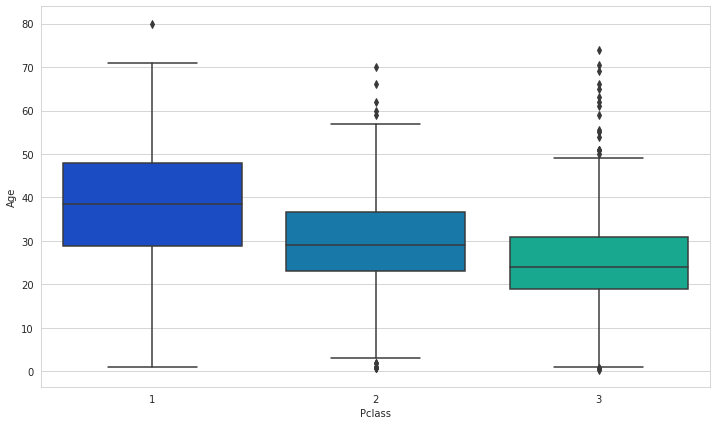

In [24]:
plt.figure(figsize=(12, 7))
sb.boxplot(x='Pclass',y='Age',data=titanic,palette='winter')

# from the given data it is concluded that
# most of the pessangers who are traveling in the class 1 lies in the range of 40, 30 and 25 in class 1, 2 and 3 respectively

## We can see the wealthier passengers in the higher classes tend to be older, which makes sense. We'll use
these average age values to impute based on Pclass for Age.

In [0]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]
    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
                return 24
    else:
        return Age

In [0]:
titanic['Age'] = titanic[['Age','Pclass']].apply(impute_age,axis=1)

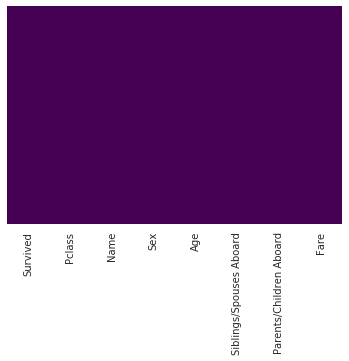

In [8]:
sb.heatmap(titanic.isnull(),yticklabels=False,cbar=False,cmap='viridis')

# no null value is present in the dataset 

In [9]:
titanic.head(5)

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


## Great! Let's go ahead and drop the Cabin column and the row in Embarked that is NaN.

In [0]:
titanic.drop('Cabin',axis=1,inplace=True)
# cabin has so many null values so we drop that column

In [34]:
titanic.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [0]:
titanic.dropna(inplace=True)

# droping the other nan value present in the dataset

## Converting Categorical Features
We'll need to convert categorical features to dummy variables using pandas! Otherwise our machine learning
algorithm won't be able to directly take in those features as inputs.

In [55]:
titanic.info()

# a summary on the non-null values and their data type

<class 'pandas.core.frame.DataFrame'>
Int64Index: 887 entries, 0 to 886
Data columns (total 8 columns):
Survived                   887 non-null int64
Pclass                     887 non-null int64
Name                       887 non-null object
Sex                        887 non-null object
Age                        887 non-null float64
Siblings/Spouses Aboard    887 non-null int64
Parents/Children Aboard    887 non-null int64
Fare                       887 non-null float64
dtypes: float64(2), int64(4), object(2)
memory usage: 62.4+ KB


## Building a Logistic Regression model
Let's start by splitting our data into a training set and test set

*** Train Test Split ***

In [0]:
titanic = titanic.drop(['Name'], axis=1)

# droping the other non-int column 

In [0]:
from sklearn.model_selection import train_test_split

# for spliting the test train data

In [0]:
x = titanic.drop(['Survived'], axis=1)
y = titanic["Survived"]

X_train, X_test, y_train, y_test = train_test_split(x, y,test_size=0.30,random_state=101)
# spliting the test train data in 30 to 70

## Training and Predicting

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
sex=pd.get_dummies(titanic["Sex"], drop_first=True)
sex.head(5)

titanic= pd.concat( [titanic, sex], axis=1 )

# converting the other non-integer type data in hot-word encoding

In [78]:
titanic.head()
#titanic.drop(['Sex'], inplace=True, axis=1)

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare,male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1


In [81]:
logmodel = LogisticRegression()
logmodel.fit(X_train,y_train)

# fiting the training and testing data into the moodel

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [83]:
predictions = logmodel.predict(X_test)
predictions
# prediting the values

array([0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 0])

## Evaluation
We can check precision,recall,f1-score using classification

In [0]:
from sklearn.metrics import classification_report

In [87]:
print(classification_report(y_test,predictions))

# checking the score

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       159
           1       0.77      0.66      0.71       108

    accuracy                           0.78       267
   macro avg       0.78      0.76      0.77       267
weighted avg       0.78      0.78      0.78       267



In [0]:
# Thank you for evaluating !!!

# Pics

In [0]:
from sklearn.datasets import load_digits
digits = load_digits()
print("Image data shape",digits.data.shape)
print("Label data shape",digits.target.shape)

Image data shape (1797, 64)
Label data shape (1797,)


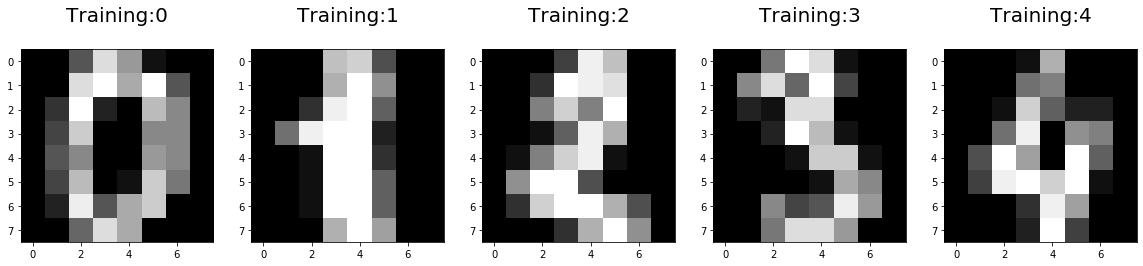

In [0]:
plt.figure(figsize=(20,40))
for index,(image,label) in enumerate(zip(digits.data[0:5],digits.target[0:5])):
    plt.subplot(1,5,index+1)
    plt.imshow(np.reshape(image,(8,8)),cmap=plt.cm.gray)
    plt.title("Training:%i\n"%label,fontsize=20)

In [0]:
x_train,x_test,y_train,y_test = train_test_split(digits.data,digits.target,test_size=0.23,random_state = 2)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(1383, 64) (414, 64) (1383,) (414,)


In [0]:
logist = LogisticRegression()
logist.fit(x_train,y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [0]:
pred = logist.predict(x_test)

score = logist.score(x_test,y_test)
print(score)

0.9516908212560387


[[37  0  0  0  1  0  0  0  0  0]
 [ 0 45  0  1  0  0  0  0  1  1]
 [ 0  0 43  0  0  0  0  0  0  0]
 [ 0  0  0 40  0  0  0  1  1  0]
 [ 0  0  0  0 34  0  0  0  3  1]
 [ 0  1  0  0  1 44  0  0  0  0]
 [ 0  1  0  0  0  0 39  0  1  0]
 [ 0  0  0  0  0  0  0 45  1  0]
 [ 0  0  0  0  0  0  0  0 37  1]
 [ 0  0  0  2  0  1  0  0  1 30]]


Text(0.5, 1, 'Accuracy Score:0.9516908212560387')

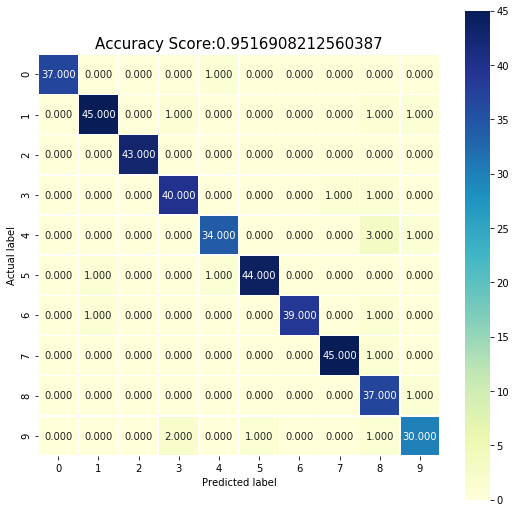

In [0]:
plt.figure(figsize=(9,9))
cm = metrics.confusion_matrix(y_test,pred)
print(cm)
sb.heatmap(cm,annot=True,fmt = ".3f",linewidths=.5,square = True,cmap='YlGnBu')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score:{0}'.format(score)
plt.title(all_sample_title,size = 15)

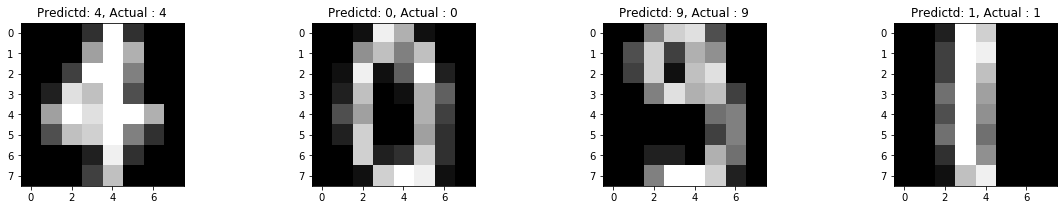

In [0]:
index = 0
misclassifiedindex = []
for predict,actual in zip(pred,y_test):
    if predict == actual:
        misclassifiedindex.append(index)
        index+=1
plt.figure(figsize=(20,3))
for plotIndex, wrong in enumerate(misclassifiedindex[0:4]):
  plt.subplot(1,4,plotIndex +1)
  plt.imshow(np.reshape(x_test[wrong],(8,8)),cmap=plt.cm.gray)
  plt.title("Predictd: {}, Actual : {}".format(pred[wrong],y_test[wrong], fontsize=20))

# Logistic Regression Cost function and Gradient Decent

Convert .txt file to .csv file.

In [0]:
df = pd.read_csv('https://raw.githubusercontent.com/deepanshumehtaa/csvfiles/master/university_admission.txt')
df.head(5)

,34.62365962451697,78.0246928153624,0
0,30.286711,43.894998,0
1,35.847409,72.902198,0
2,60.182599,86.308552,1
3,79.032736,75.344376,1
4,45.083277,56.316372,0


In [0]:
df.to_csv('my_csv.csv')

Name the first column as Marks 1, second as Marks 2 and third column as admission. Consider 0 as not admitted and 1 as admitted

In [0]:
# very Important
# https://cmdlinetips.com/2018/03/how-to-change-column-names-and-row-indexes-in-pandas/

df.columns = ['Marks_1', 'Marks_2' , 'admission']
df

,Marks_1,Marks_2,admission
0,30.286711,43.894998,0
1,35.847409,72.902198,0
2,60.182599,86.308552,1
3,79.032736,75.344376,1
4,45.083277,56.316372,0
...,...,...,...
94,83.489163,48.380286,1
95,42.261701,87.103851,1
96,99.315009,68.775409,1
97,55.340018,64.931938,1


In [0]:
# df.replace({'column_name':{ initail : Changed } })

df.replace({'admission':{ 0 : 'not admitted', 1 : 'admitted' } }, inplace=True)
df.head(5)

,Marks_1,Marks_2,admission
0,30.286711,43.894998,not admitted
1,35.847409,72.902198,not admitted
2,60.182599,86.308552,admitted
3,79.032736,75.344376,admitted
4,45.083277,56.316372,not admitted


Plot scatter graph between exam 1 and exam 2. The marker should be x for not admitted and + for admitted.

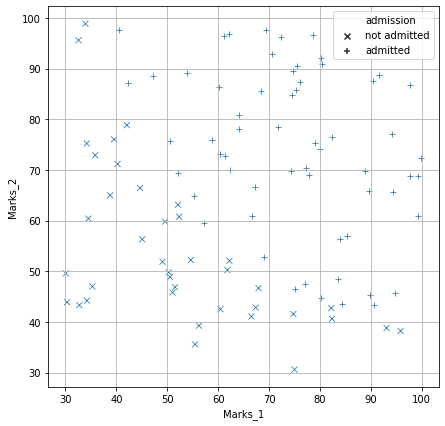

In [0]:
mkr_dict = {'admitted': '+', 'not admitted': 'x'}

#for kind in mkr_dict:( plt.scatter(df['Marks 1'], df['Marks 2'],marker = mkr_dict[kind]))

plt.figure(figsize=(7,7))
ax = sb.scatterplot(x="Marks_1", y="Marks_2", data=df, style="admission", markers=mkr_dict)
plt.grid()
plt.show()

 Calculate Sigmoid Function

<Figure size 432x288 with 0 Axes>

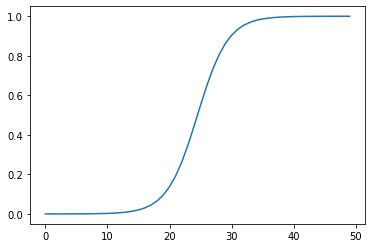

<Figure size 432x288 with 0 Axes>

In [0]:
#Intro
import math

def sigmoid(x):
    a = []
    for item in x:
        a.append(1/(1+math.exp(-item)))
    return a


plt.plot( sigmoid(np.linspace(-10,10)) )
plt.figure()


[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]
Sigmoid Function results in: 1.0


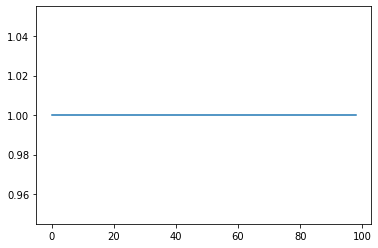

In [0]:
#Calculate Sigmoid Function
import math

# Thethas
t0=0
t1=0
t2=0

m1=df['Marks_1'].to_list()
m2=df['Marks_2'].to_list()
Adm=df['admission'].to_list()

sigg = []
for i in range(len(m1)):
    sig=1/(1+np.exp(-(t0+t1*m1[i]+t2*m1[i])))
    sigg.append(sig)

plt.plot(sigg)
print(sigg)
print('Sigmoid Function results in:',sig)

In [0]:
alpha=0.0001
l=len(m1)# l=100
lst=[] # cost function
for i in range(100):
 cost=0
 for j in range(l):
 sig=1/(1+np.exp(-(Q0+Q1*m1[j]+Q2*m2[j])))
 cost-=((1/l)*(Adm[j]*np.log(sig)+(1-Adm[j])*np.log(1-sig)))
 lst.append(cost)

 gd1=0
 for k in range(l):
 gd1+=(1/(1+np.exp(-(Q0+Q1*m1[k]+Q2*m2[k])))-Adm[k])
 Q0-=alpha*(gd1/l)

 gd2=0
 for k in range(l):
 gd2+=(1/(1+np.exp(-(Q0+Q1*m1[k]+Q2*m2[k])))-Adm[k])*m1[k]
 Q1-=alpha*(gd2/l)

 gd3=0
 for k in range(l):
 gd3+=(1/(1+np.exp(-(Q0+Q1*m1[k]+Q2*m2[k])))-Adm[k])*m2[k]
 Q2-=alpha*(gd3/l)

plt.plot(range(100),lst)
plt.xlabel('Number of Iterations')
plt.ylabel('Cost function')

IndentationError: ignored